In [99]:
import random
import sampler
import timeit
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
%timeit -n 100000 [sampler.sample(range(1000), 1)] 
%timeit -n 100000 [sampler.sample(range(1000), 10)] 
%timeit -n 100000 [sampler.sample(range(1000), 50)] 
%timeit -n 100000 [sampler.sample(range(1000), 100)] 

8.2 µs ± 180 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
13.2 µs ± 465 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
47.9 µs ± 7.29 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
89.1 µs ± 395 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [12]:
%timeit -n 100000 [sampler.sample(range(1000), 250)] 
%timeit -n 100000 [sampler.sample(range(1000), 500)]

112 µs ± 1.39 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
347 µs ± 50.1 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [11]:
%timeit -n 100000 [sampler.sample(range(1000), 750)] 

528 µs ± 94.5 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [16]:
%timeit -n 100000 [sampler.sample(range(1000), 999)]

472 µs ± 46.7 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [3]:
sampler_distibution = [item for sublist in [sampler.sample(range(1000), 500) for _ in range(10000)] for item in sublist]

Text(0.5, 0, 'Data')

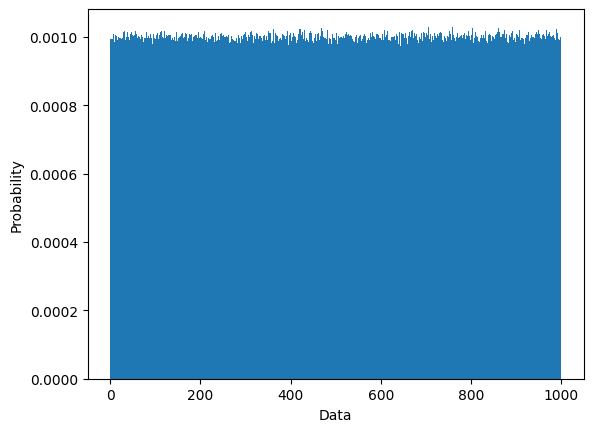

In [4]:
%matplotlib inline

plt.hist(sampler_distibution, density=True, bins=1000)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data')

Text(0.5, 0, 'Data')

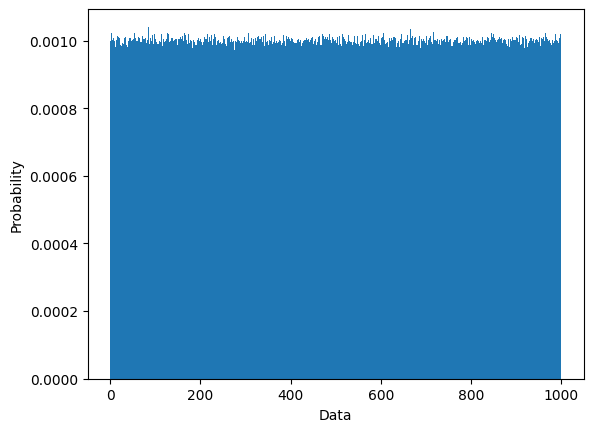

In [5]:
random_distibution = [item for sublist in [random.sample(range(1000), 500) for _ in range(10000)] for item in sublist]
%matplotlib inline

plt.hist(random_distibution, density=True, bins=1000)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data')

In [13]:
%timeit -n 100000 [random.sample(range(1000), 1)] 
%timeit -n 100000 [random.sample(range(1000), 10)] 
%timeit -n 100000 [random.sample(range(1000), 50)] 
%timeit -n 100000 [random.sample(range(1000), 100)] 

972 ns ± 63.9 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
2.8 µs ± 73.6 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
10.3 µs ± 286 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
25.3 µs ± 6.99 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [14]:
%timeit -n 100000 [random.sample(range(1000), 250)] 
%timeit -n 100000 [random.sample(range(1000), 500)]

87.9 µs ± 347 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
151 µs ± 36.4 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [15]:
%timeit -n 100000 [random.sample(range(1000), 750)] 

176 µs ± 54 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [17]:
%timeit -n 100000 [random.sample(range(1000), 999)]

171 µs ± 1.68 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [58]:
sampler_times = {
    "n": [1, 10, 50, 100, 250, 500, 750, 999],
    "time": [8.2, 13.2, 47.9, 89.1, 112, 347, 528, 472],
    "error": [0.180, 0.465, 7.29, 0.395, 1.39, 50.1, 94.5, 46.7]
}

st_df = pd.DataFrame(sampler_times)

In [66]:
random_times = {
    "n": [1, 10, 50, 100, 250, 500, 750, 999],
    "time": [0.972, 2.8, 10.3, 25.3, 87.9, 151, 176, 171],
    "error": [0.0639, 0.0736, 0.268, 6.99, 0.347, 36.4, 54, 1.68]
}

rt_df = pd.DataFrame(random_times)

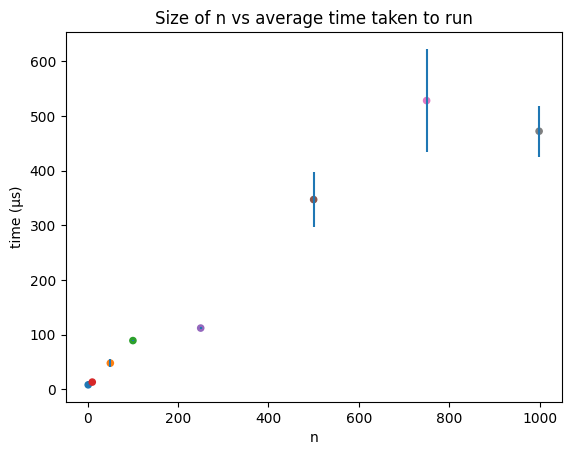

In [87]:
ax = st_df.plot(kind='scatter', x="n", y="time", yerr='error', color=['C0', 'C3', 'C1', 'C2', 'C4', 'C5', 'C6', 'C7'], ylabel="time (µs)", title="Size of n vs average time taken to run")

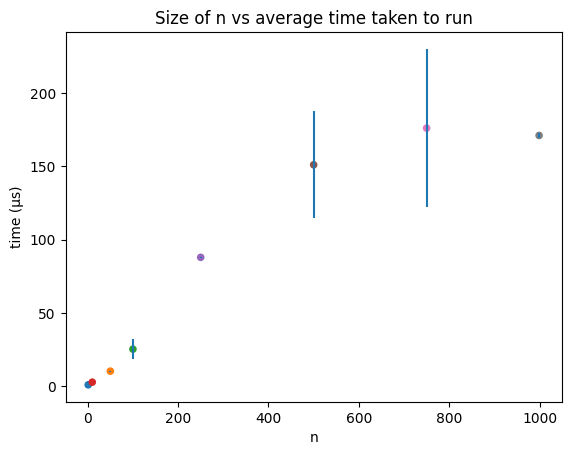

In [88]:
ax = rt_df.plot(kind='scatter', x="n", y="time", yerr='error', color=['C0', 'C3', 'C1', 'C2', 'C4', 'C5', 'C6', 'C7'], ylabel="time (µs)",  title="Size of n vs average time taken to run")

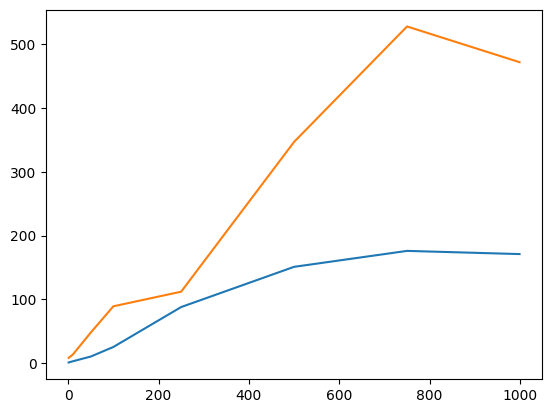

In [80]:
for frame in [rt_df, st_df]:
    plt.plot(frame['n'], frame['time'])

<Figure size 640x480 with 0 Axes>

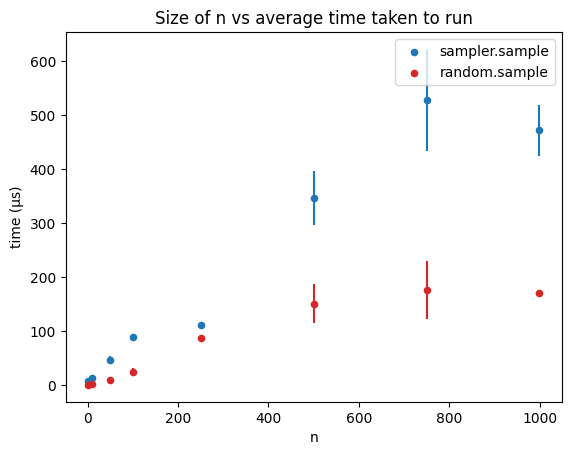

In [96]:
fig=plt.figure()
ax = st_df.plot(kind='scatter', x="n", y="time", yerr='error', color=['C0'], ylabel="time (µs)", title="Size of n vs average time taken to run")
ax2 = rt_df.plot(kind='scatter', x="n", y="time", yerr='error', color=['C3'], ylabel="time (µs)",  title="Size of n vs average time taken to run", ax=ax)
ax2.legend(["sampler.sample", "random.sample"])

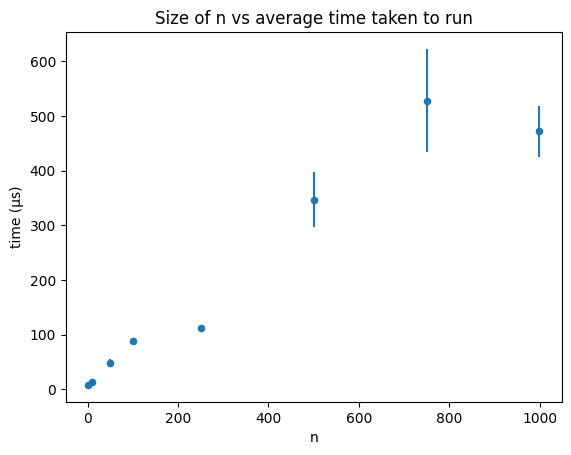

In [97]:
ax = st_df.plot(kind='scatter', x="n", y="time", yerr='error', color=['C0'], ylabel="time (µs)", title="Size of n vs average time taken to run")


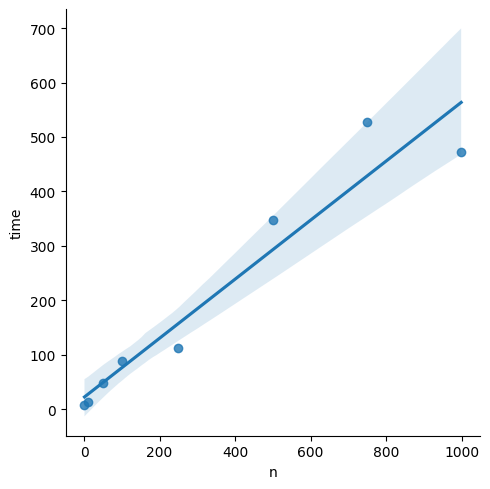

In [100]:
sns.lmplot(x='n',y='time',data=st_df,fit_reg=True) 